In [10]:
import os
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nilm_dao import get_label_encoder, get_vndale1_data

In [11]:
label_encoder = get_label_encoder("vndale1")
train_df = get_vndale1_data("train", rms_window_size=1800)

Getting train data - window size: 1800: 100%|██████████| 128/128 [02:22<00:00,  1.11s/it]


In [12]:
train_df

Time,In,Un,PF_n,Irms,Urms,MeanPF,P,Q,S,Label
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
"""2024-01-15_14-…",-0.106326,-105.304626,0.925196,0.525426,165.12274,0.923943,80.160988,12.695542,86.759699,43
"""2024-01-15_14-…",-0.676626,-198.729904,0.925196,0.525464,165.128986,0.923943,80.169978,12.696874,86.76938,43
"""2024-01-15_14-…",-0.874638,-222.35408,0.925196,0.525263,165.062639,0.923944,80.10716,12.686833,86.701341,43
"""2024-01-15_14-…",-0.910625,-216.100937,0.925196,0.52486,164.992391,0.923943,80.011565,12.671879,86.597977,43
"""2024-01-15_14-…",-0.414281,-141.514832,0.925196,0.524583,164.974161,0.923942,79.960321,12.663948,86.542614,43
"""2024-01-15_14-…",0.221459,-26.120417,0.925196,0.524877,165.024441,0.923941,80.029394,12.675073,86.617474,43
"""2024-01-15_14-…",0.438486,68.364914,0.925196,0.525283,165.104571,0.923939,80.130183,12.691222,86.72666,43
"""2024-01-15_14-…",0.405707,183.136978,0.925196,0.525403,165.147218,0.923938,80.169098,12.697571,86.768878,43
"""2024-01-15_14-…",0.47628,223.126877,0.925196,0.525317,165.097131,0.923937,80.131548,12.691809,86.728338,43


In [14]:
label_encoder.classes_

array(['0', '1', '1,2', '1,2,3', '1,2,3,4', '1,2,3,4,5', '1,2,3,4,5,6',
       '1,2,3,4,5,6,7', '1,2,3,4,5,7', '1,2,3,4,6', '1,2,3,4,6,7',
       '1,2,3,4,7', '1,2,3,5', '1,2,3,5,6', '1,2,3,5,6,7', '1,2,3,5,7',
       '1,2,3,6', '1,2,3,6,7', '1,2,3,7', '1,2,4', '1,2,4,5', '1,2,4,5,6',
       '1,2,4,5,6,7', '1,2,4,5,7', '1,2,4,6', '1,2,4,6,7', '1,2,4,7',
       '1,2,5', '1,2,5,6', '1,2,5,6,7', '1,2,5,7', '1,2,6', '1,2,6,7',
       '1,2,7', '1,3', '1,3,4', '1,3,4,5', '1,3,4,5,6', '1,3,4,5,6,7',
       '1,3,4,5,7', '1,3,4,6', '1,3,4,6,7', '1,3,4,7', '1,3,5', '1,3,5,6',
       '1,3,5,6,7', '1,3,5,7', '1,3,6', '1,3,6,7', '1,3,7', '1,4',
       '1,4,5', '1,4,5,6', '1,4,5,6,7', '1,4,5,7', '1,4,6', '1,4,6,7',
       '1,4,7', '1,5', '1,5,6', '1,5,6,7', '1,5,7', '1,6', '1,6,7', '1,7',
       '2', '2,3', '2,3,4', '2,3,4,5', '2,3,4,5,6', '2,3,4,5,6,7',
       '2,3,4,5,7', '2,3,4,6', '2,3,4,6,7', '2,3,4,7', '2,3,5', '2,3,5,6',
       '2,3,5,6,7', '2,3,5,7', '2,3,6', '2,3,6,7', '2,3,7', '2,4',
     

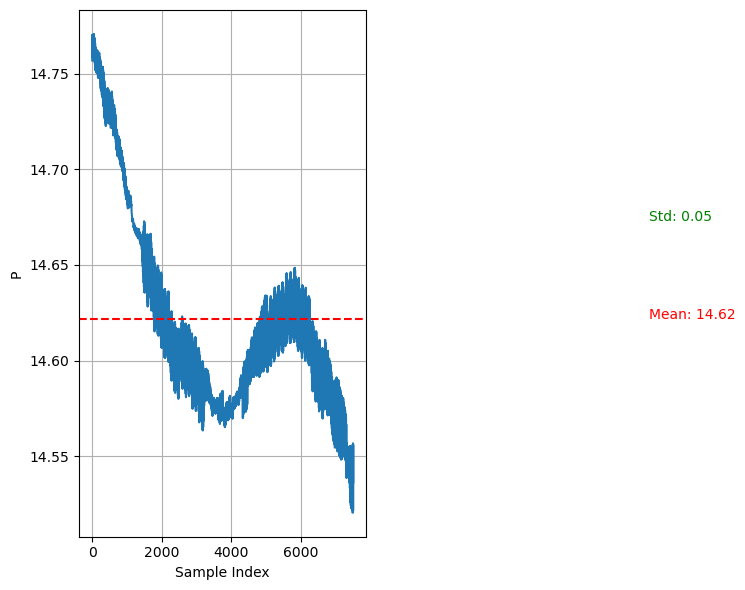

{'mean': 14.621516555690357, 'std': 0.05170111390180482, 'min': 14.520410247790535, 'max': 14.770821207450483, 'count': 7500}


In [90]:
label = '2'
column_name = 'P'
length = 20000

label_value = label_encoder.transform([label])[0] 

# Filter the dataframe for the specified label
filtered_df = train_df.filter(pl.col("Label") == label_value)[5000:12500]

# Convert to pandas for easier plotting with matplotlib
pd_df = filtered_df.head(length).to_pandas()

# Get the original label name using the label encoder
original_label = label_encoder.inverse_transform([label_value])[0]

# Create the plot
plt.figure(figsize=(20, 6))
plt.plot(pd_df[column_name])
plt.title(f'')
plt.xlabel('Sample Index')
plt.ylabel(column_name)
plt.grid(True)

# Add some statistics to the plot
mean_val = pd_df[column_name].mean()
std_val = pd_df[column_name].std()
plt.axhline(y=mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.text(length*0.8, mean_val, f'Mean: {mean_val:.2f}', color='r')
plt.text(length*0.8, mean_val + std_val, f'Std: {std_val:.2f}', color='g')

plt.tight_layout()
plt.show()

# Return some basic statistics about the data
stats = {
    "mean": float(filtered_df.select(pl.mean(column_name)).item()),
    "std": float(filtered_df.select(pl.std(column_name)).item()),
    "min": float(filtered_df.select(pl.min(column_name)).item()),
    "max": float(filtered_df.select(pl.max(column_name)).item()),
    "count": len(filtered_df)
}

print(stats)

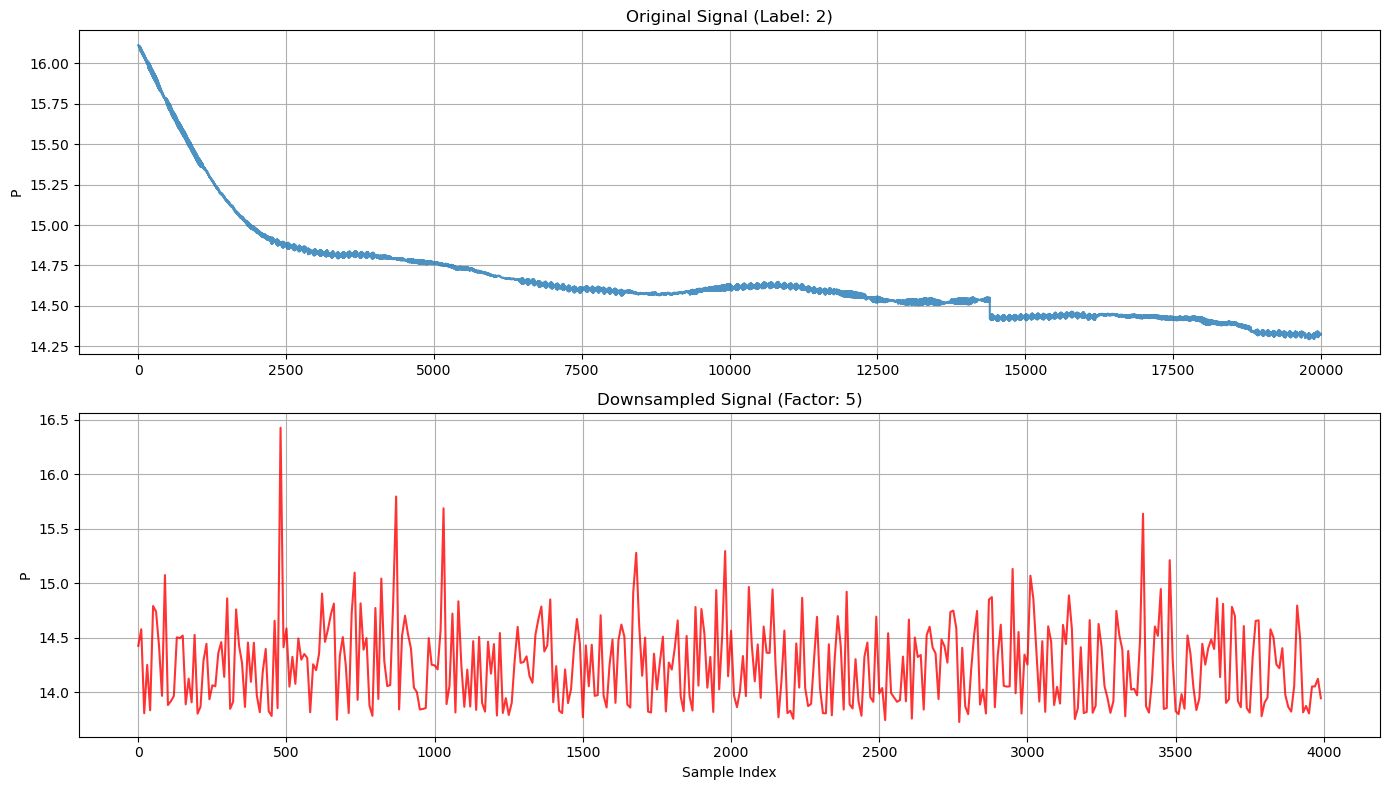

Original data statistics: {'mean': 14.666353802808905, 'std': 0.3198495875009541, 'data points': 20000}
Downsampled data statistics: {'mean': 14.260517094874661, 'std': 0.36922908366681784, 'data points': 115200}


In [87]:
# Define a downsampling factor
downsample_factor = 5

# Downsample the power signal
downsampled_df = filtered_df.select(pl.col('Time'), pl.col(column_name)).sample(fraction=1/downsample_factor, seed=42)

# Convert to pandas for plotting
downsampled_pd = downsampled_df.to_pandas()

# Plot the original signal vs downsampled signal
plt.figure(figsize=(14, 8))

# Plot original signal (first 2000 points)
plt.subplot(2, 1, 1)
plt.plot(pd_df[column_name], alpha=0.8)
plt.title(f'Original Signal (Label: {original_label})')
plt.ylabel(column_name)
plt.grid(True)

# Plot downsampled signal (first 200 points corresponding to the same time window)
plt.subplot(2, 1, 2)
sample_count = 2000 // downsample_factor
downsampled_sample = downsampled_pd.head(sample_count * 10).iloc[::10][:sample_count]
plt.plot(downsampled_sample[column_name], 'r-', alpha=0.8)
plt.title(f'Downsampled Signal (Factor: {downsample_factor})')
plt.xlabel('Sample Index')
plt.ylabel(column_name)
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics for comparison
original_stats = {
    "mean": float(pd_df[column_name].mean()),
    "std": float(pd_df[column_name].std()),
    "data points": len(pd_df)
}
downsampled_stats = {
    "mean": float(downsampled_pd[column_name].mean()),
    "std": float(downsampled_pd[column_name].std()),
    "data points": len(downsampled_pd)
}

print("Original data statistics:", original_stats)
print("Downsampled data statistics:", downsampled_stats)

In [84]:
downsampled_sample.to_excel("downsampled_data.xlsx", index=False)